#**How to Train YOLO11 Object Detection Model on a Custom Dataset**

In [3]:
!nvidia-smi

Tue Oct  8 10:53:30 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   33C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**Step 01 # Install the Ultralytics Package**

In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.0/883.0 kB 16.6 MB/s eta 0:00:00a 0:00:01


**Step 02 # Import All the Requried Libraries**

In [5]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.7 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


In [6]:
from ultralytics import YOLO
from IPython.display import Image

**Step # 03 Download Dataset from Roboflow**

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Z4dN3gIkzs0lcKpz99ax")
project = rf.workspace("project-kfiwn").project("crowd-control")
version = project.version(1)
dataset = version.download("yolov11")
                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 2.2 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to crowd-control-1 in yolov11:: 100%|██████████| 4720/4720 [00:01<00:00, 3552.99it/s]


In [8]:
dataset.location

'/kaggle/working/crowd-control-1'

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [11]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640 batch=4


Ultralytics 8.3.7 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/crowd-control-1/data.yaml, epochs=50, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

**Step # 05 Examine Training Results**

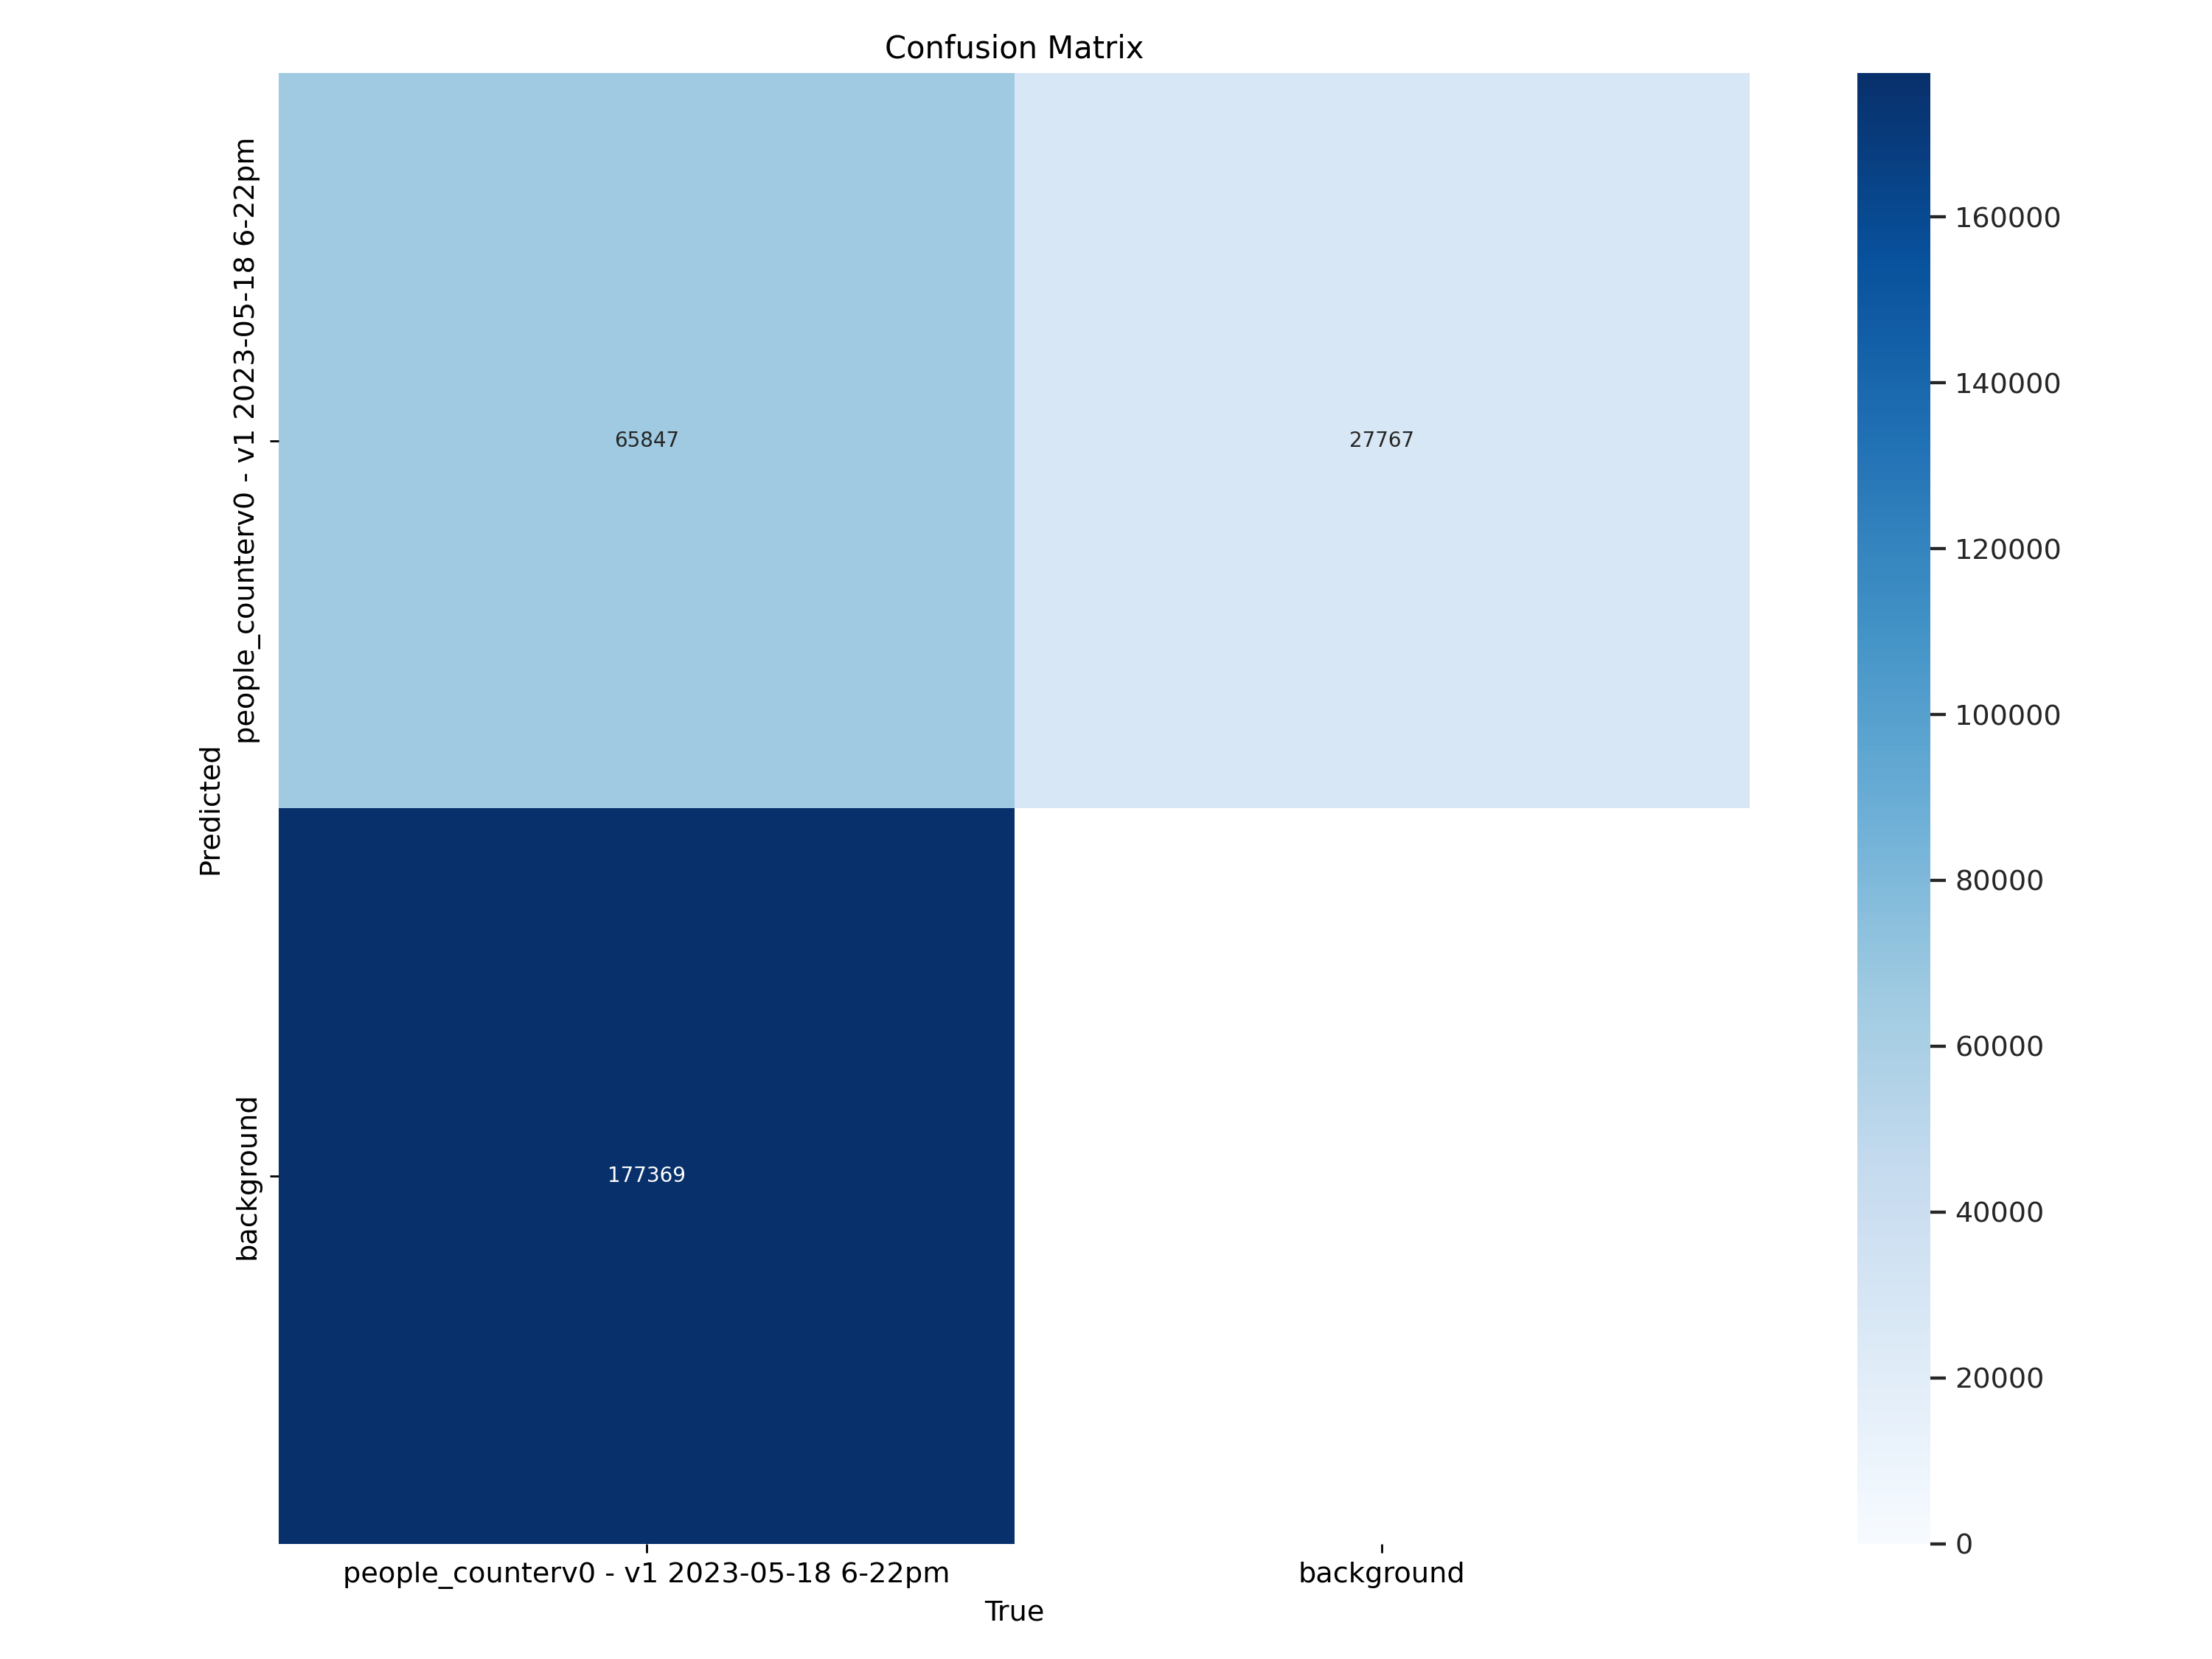

In [18]:
Image("/kaggle/working/runs/detect/train2/confusion_matrix.png", width=600)

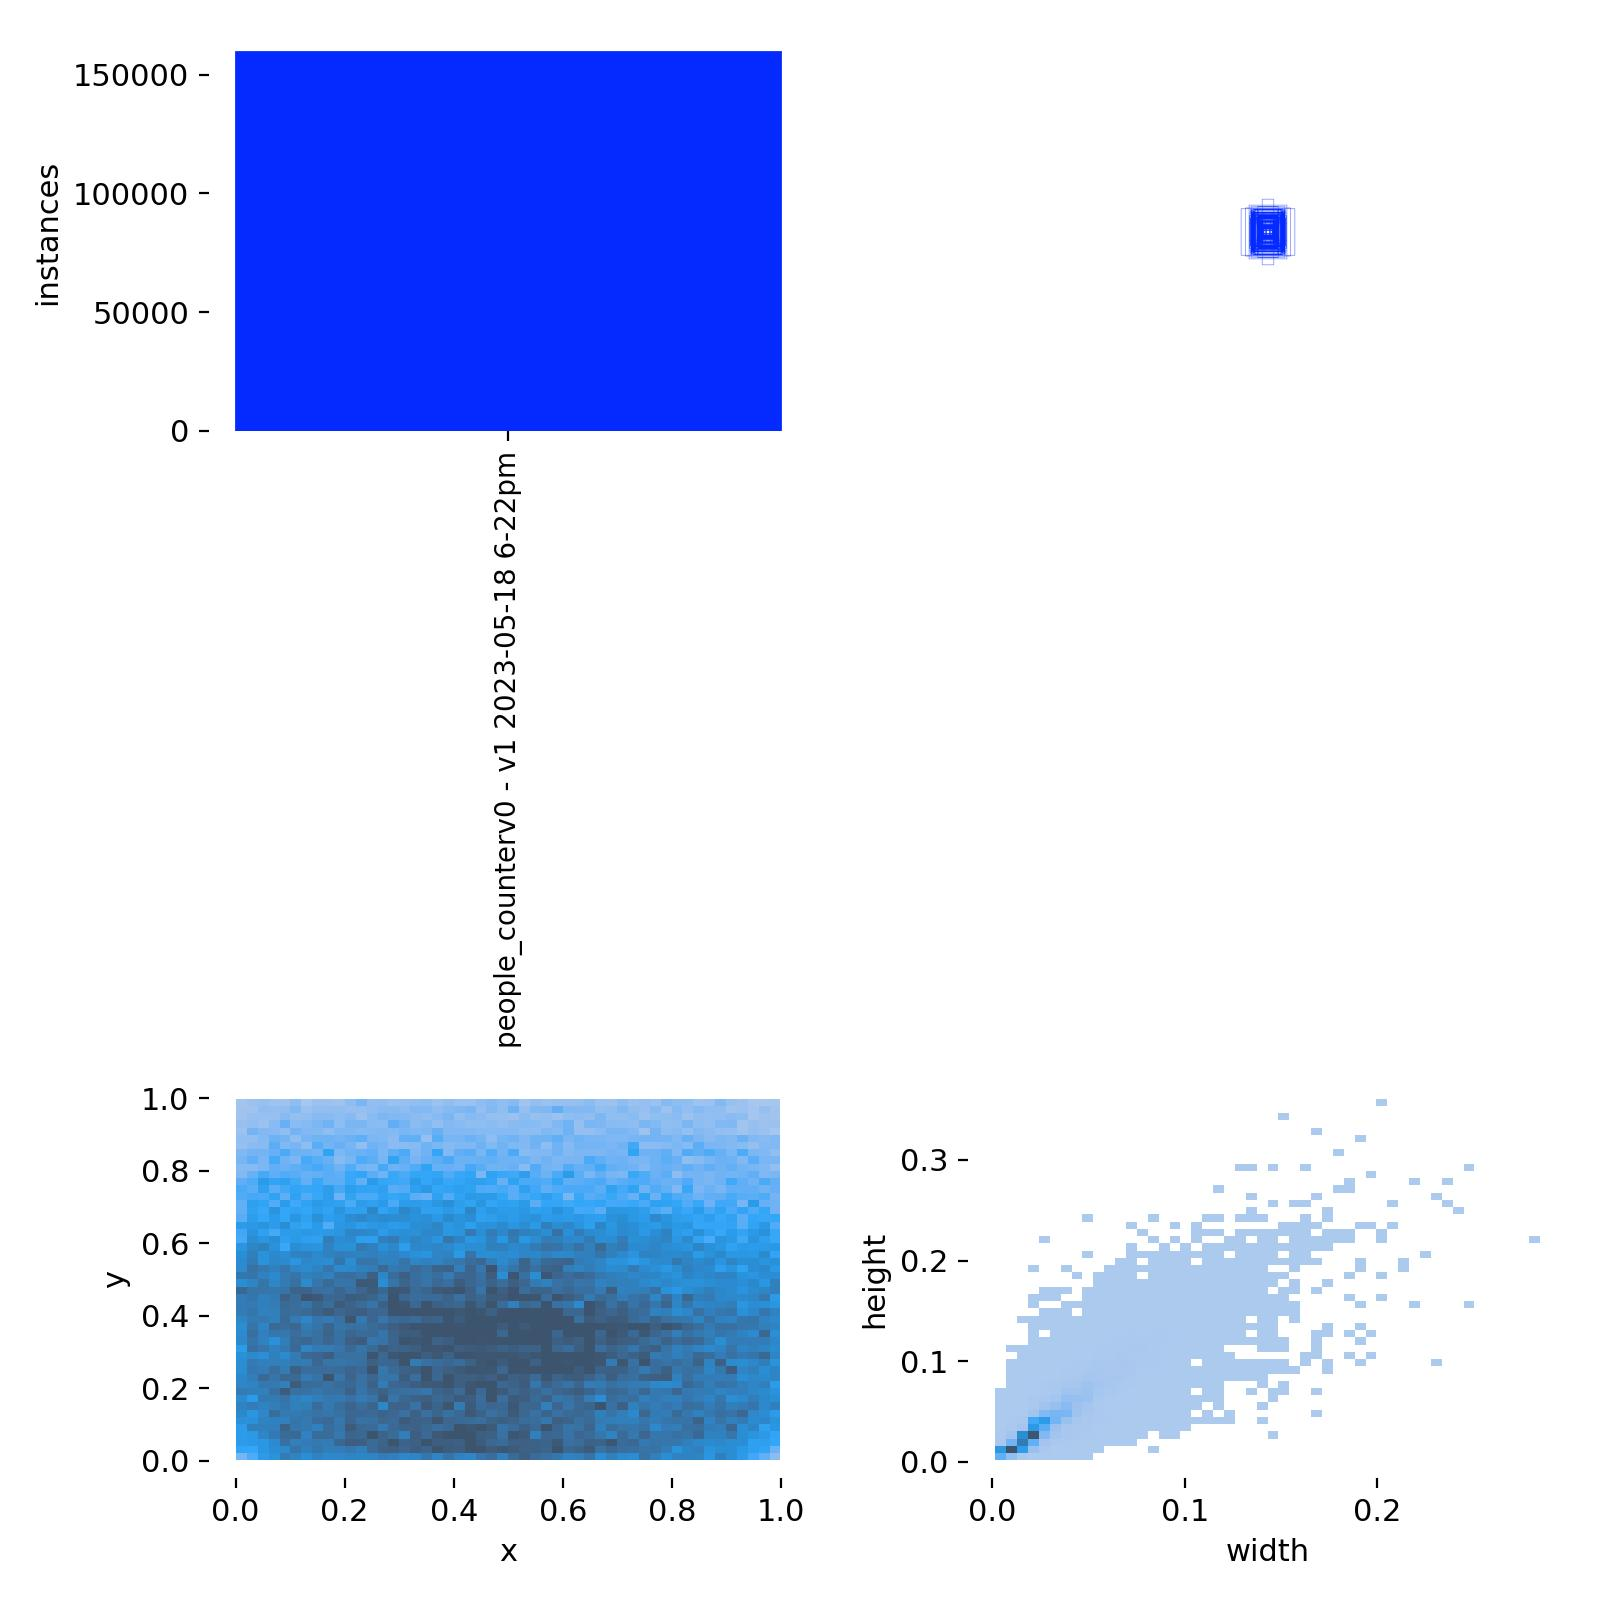

In [21]:
Image("/kaggle/working/runs/detect/train2/labels.jpg", width=600)

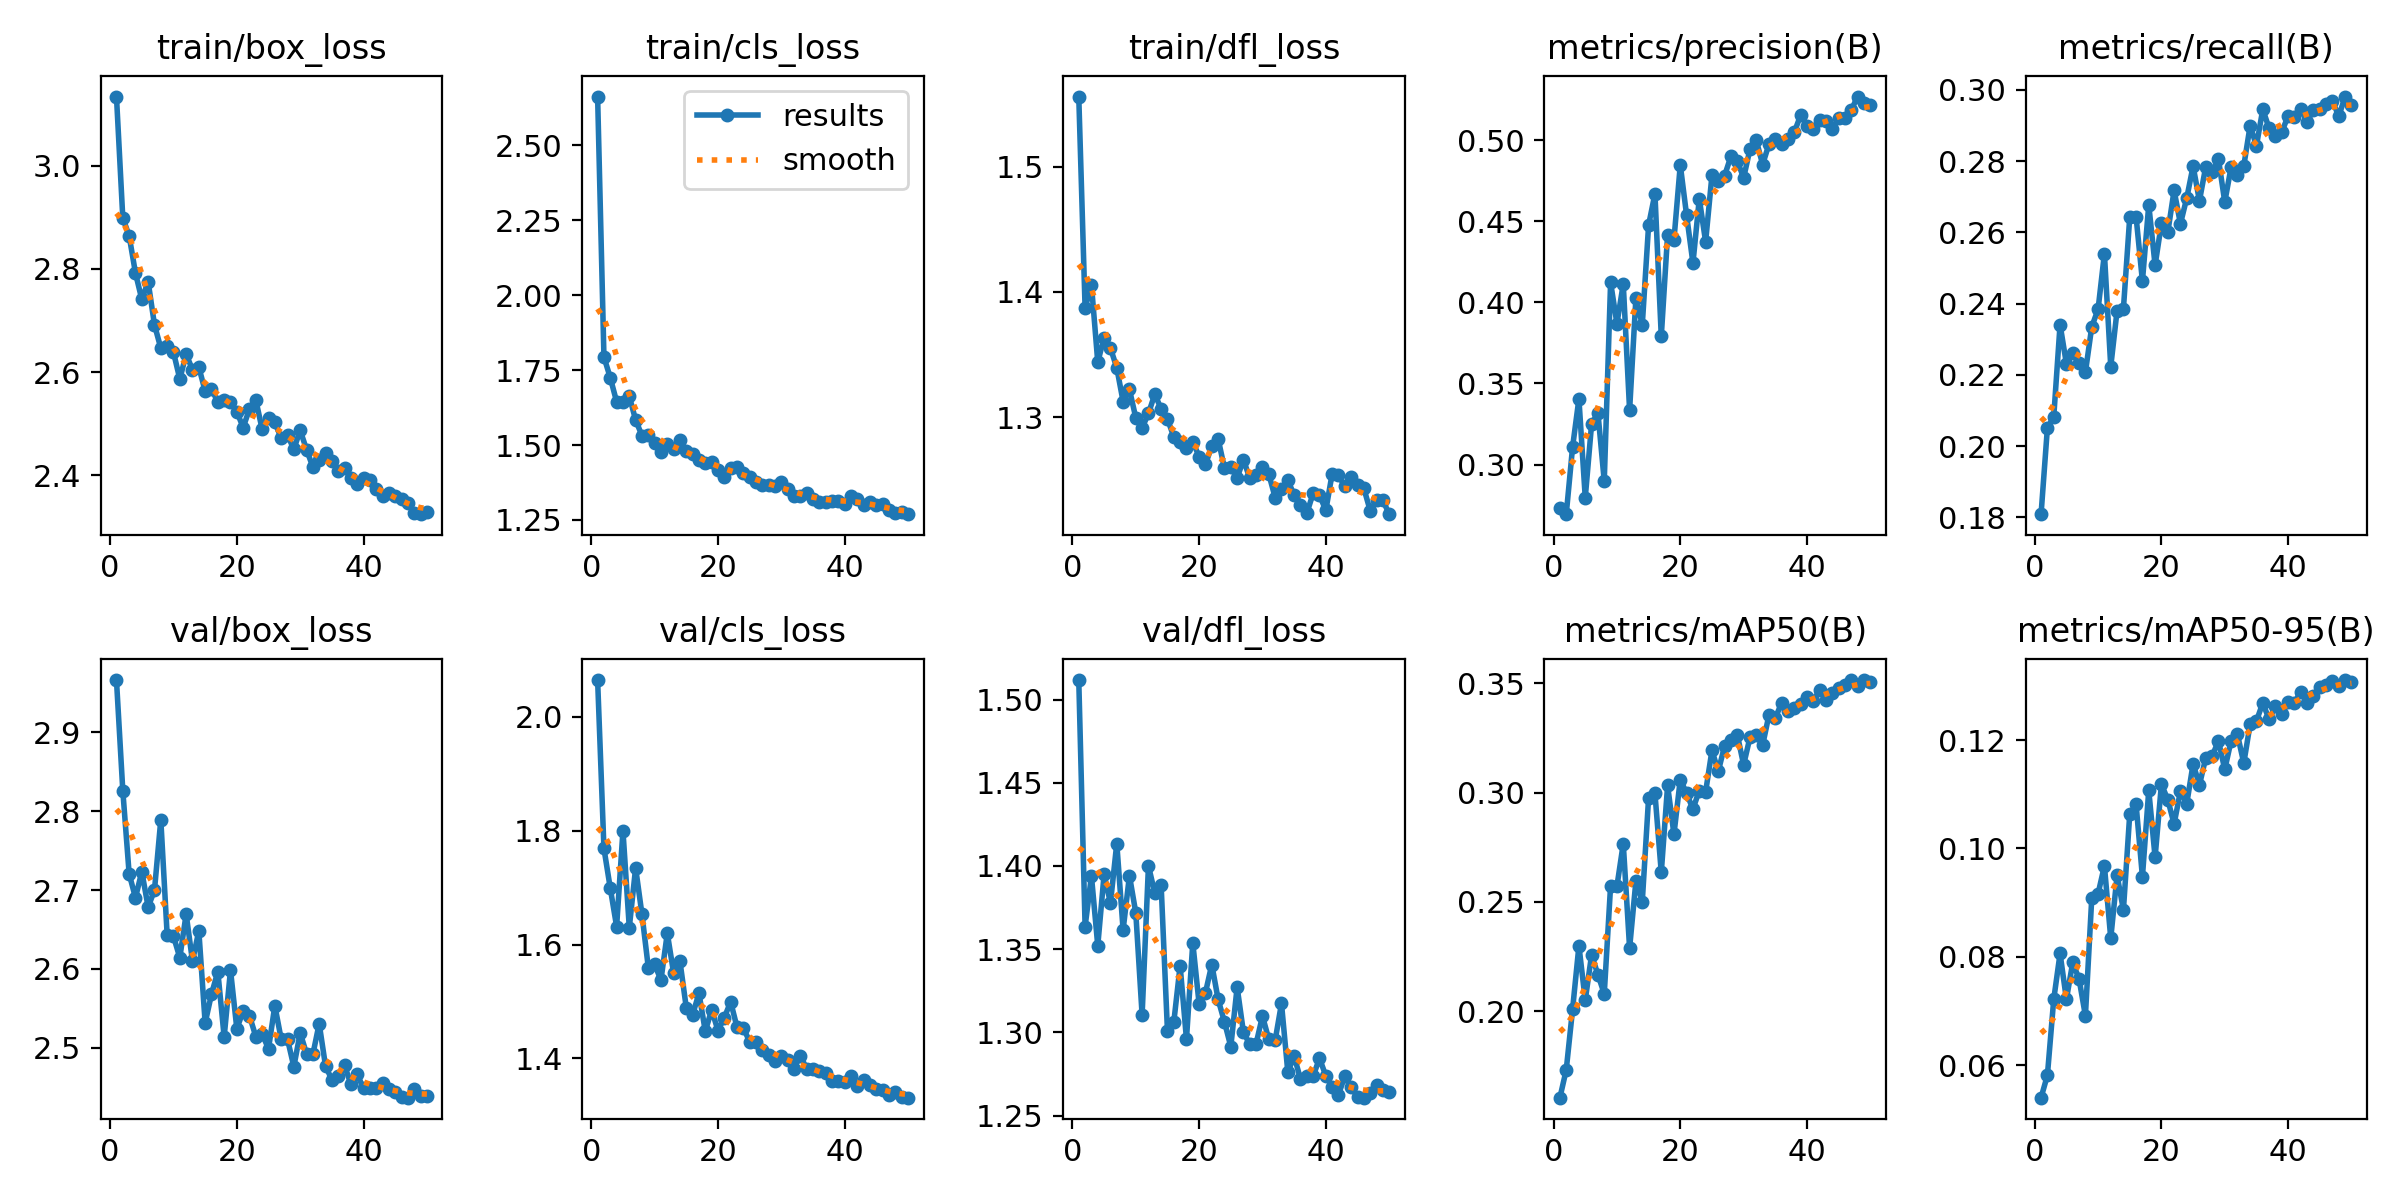

In [22]:
Image("/kaggle/working/runs/detect/train2/results.png", width=600)

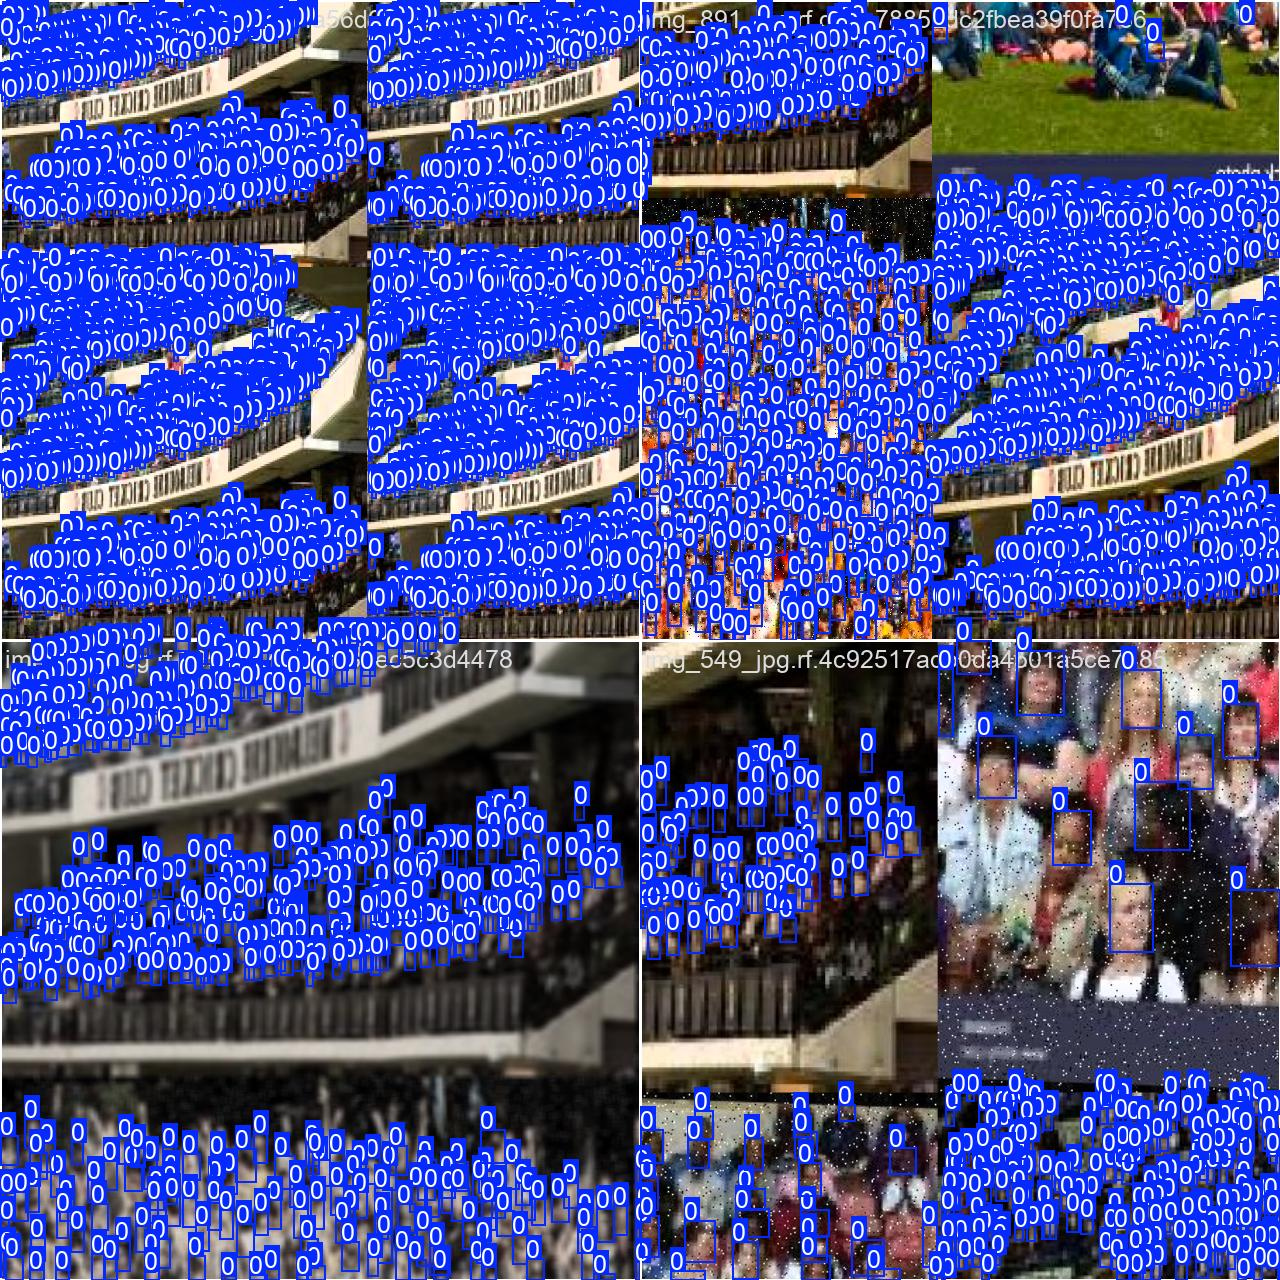

In [24]:
Image("/kaggle/working/runs/detect/train2/train_batch0.jpg", width=600)

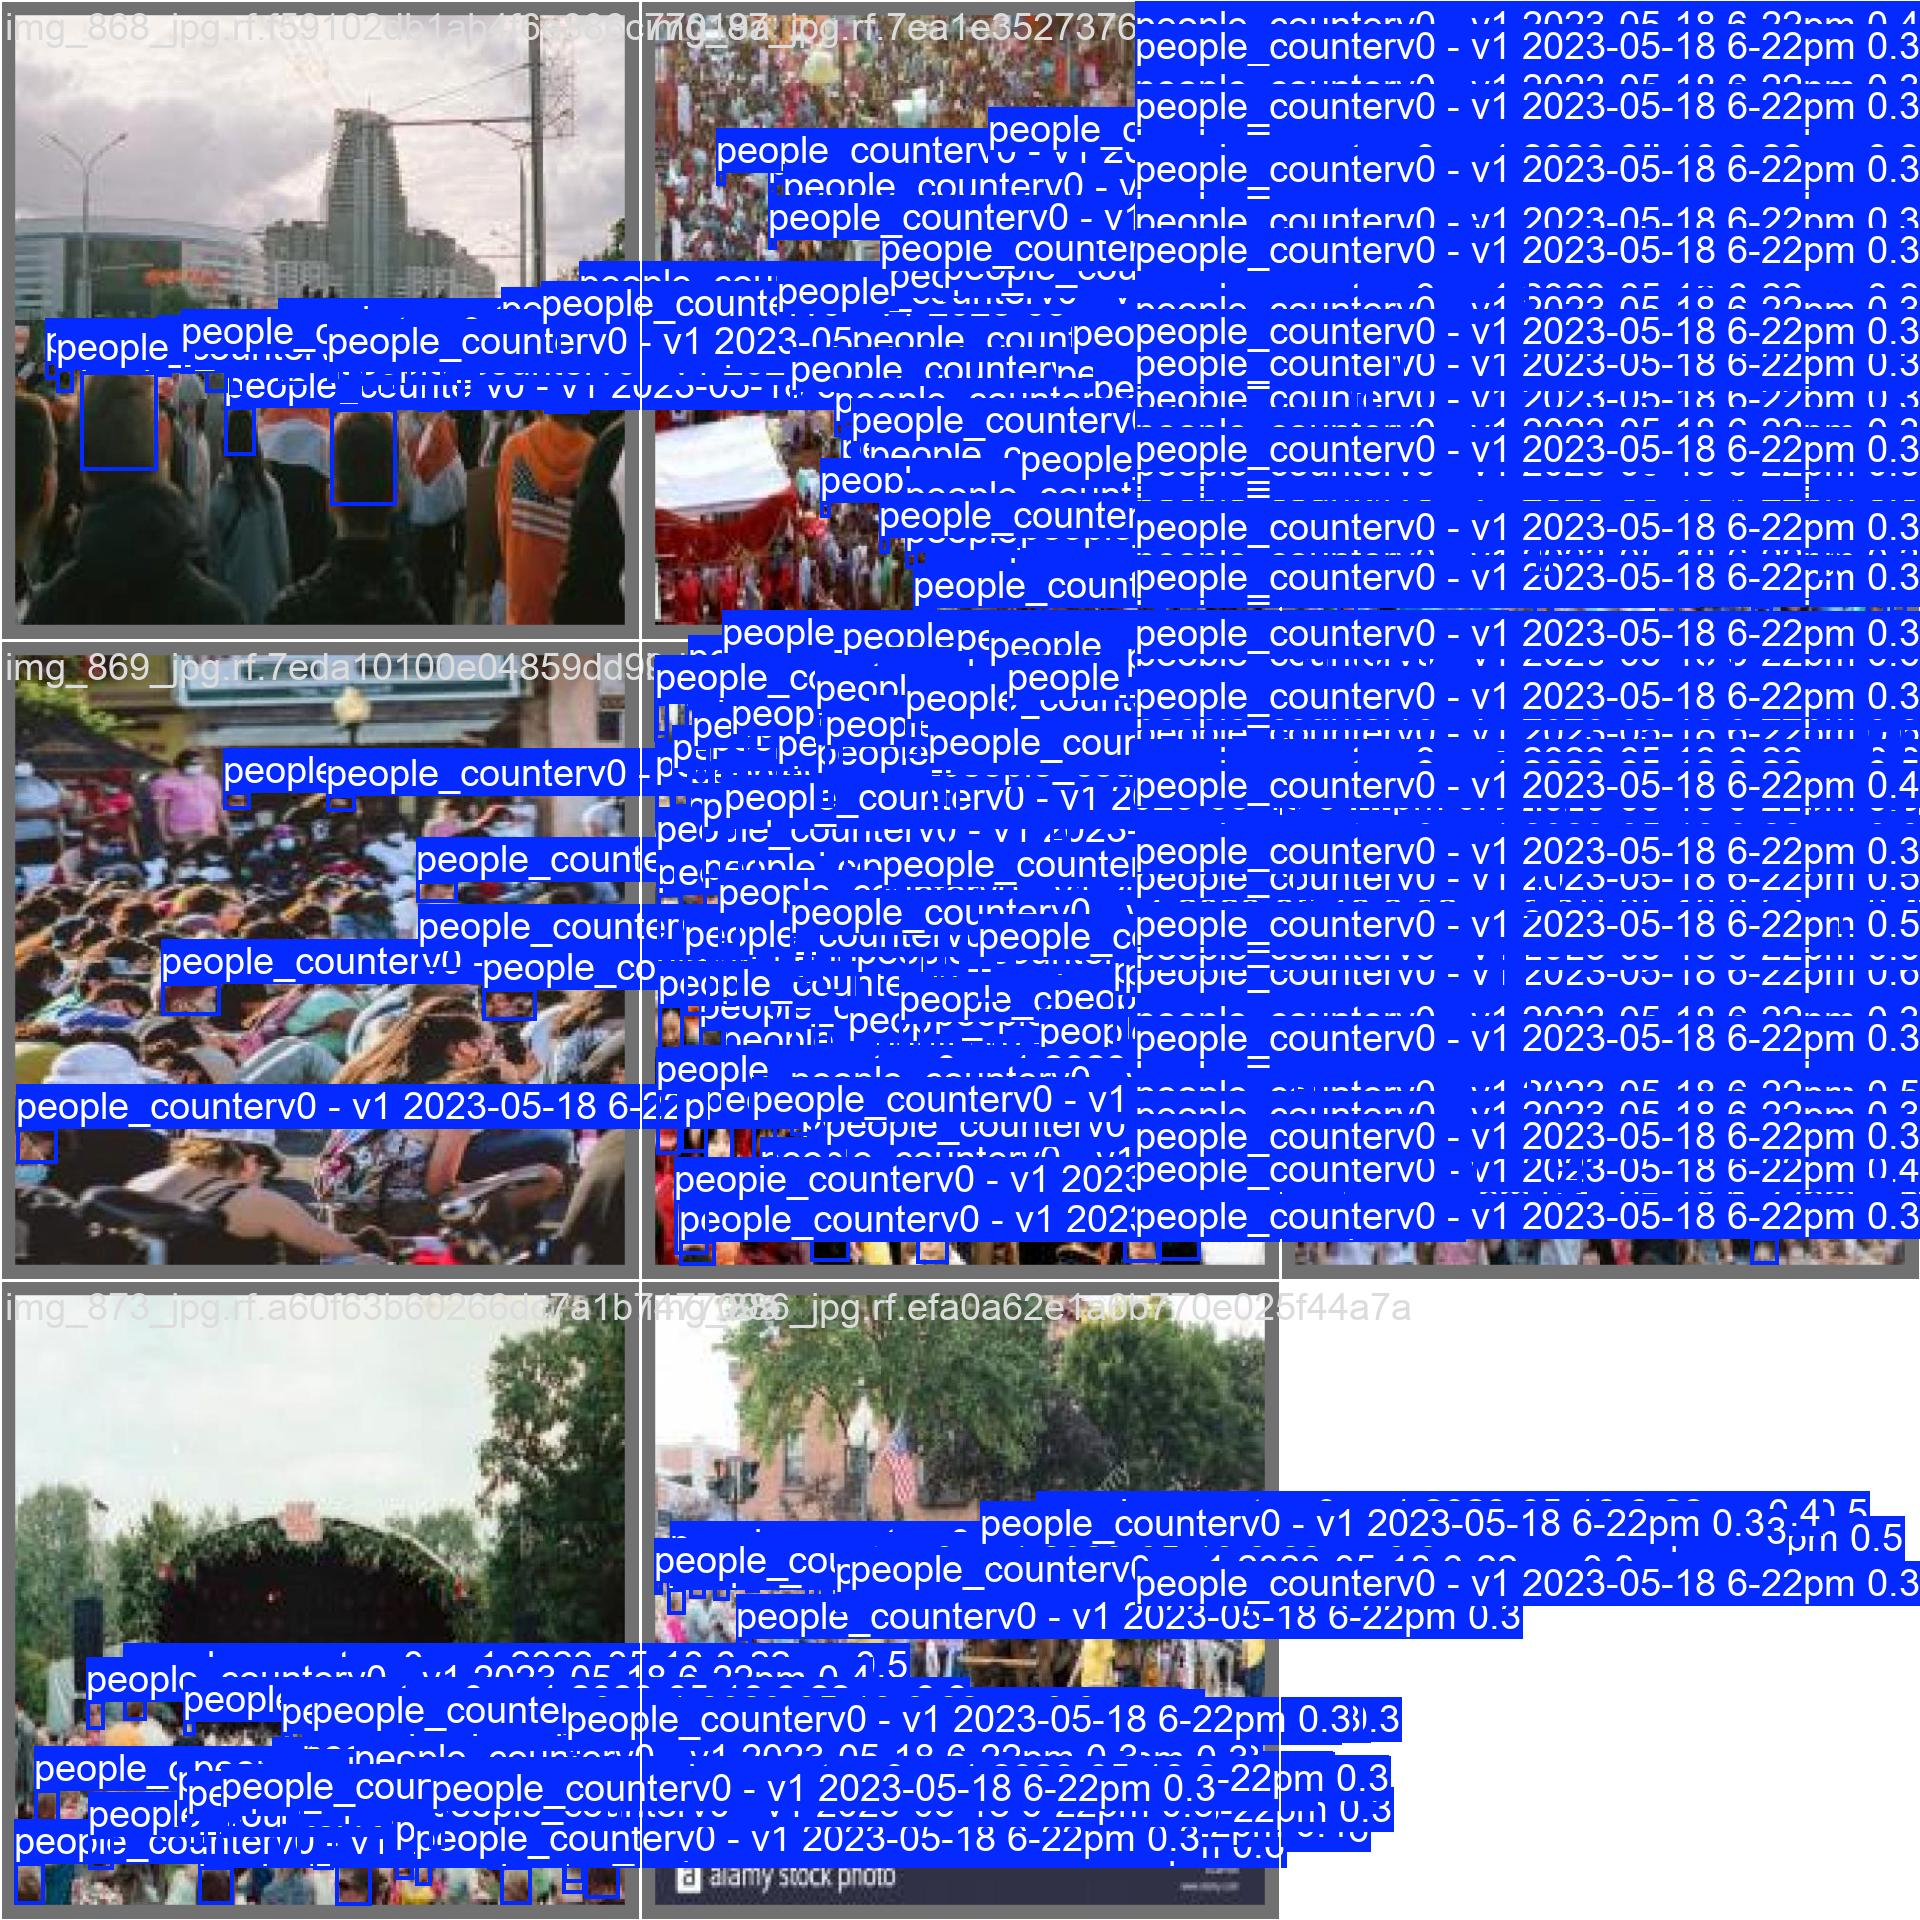

In [25]:
Image("/kaggle/working/runs/detect/train2/val_batch0_pred.jpg", width=600)

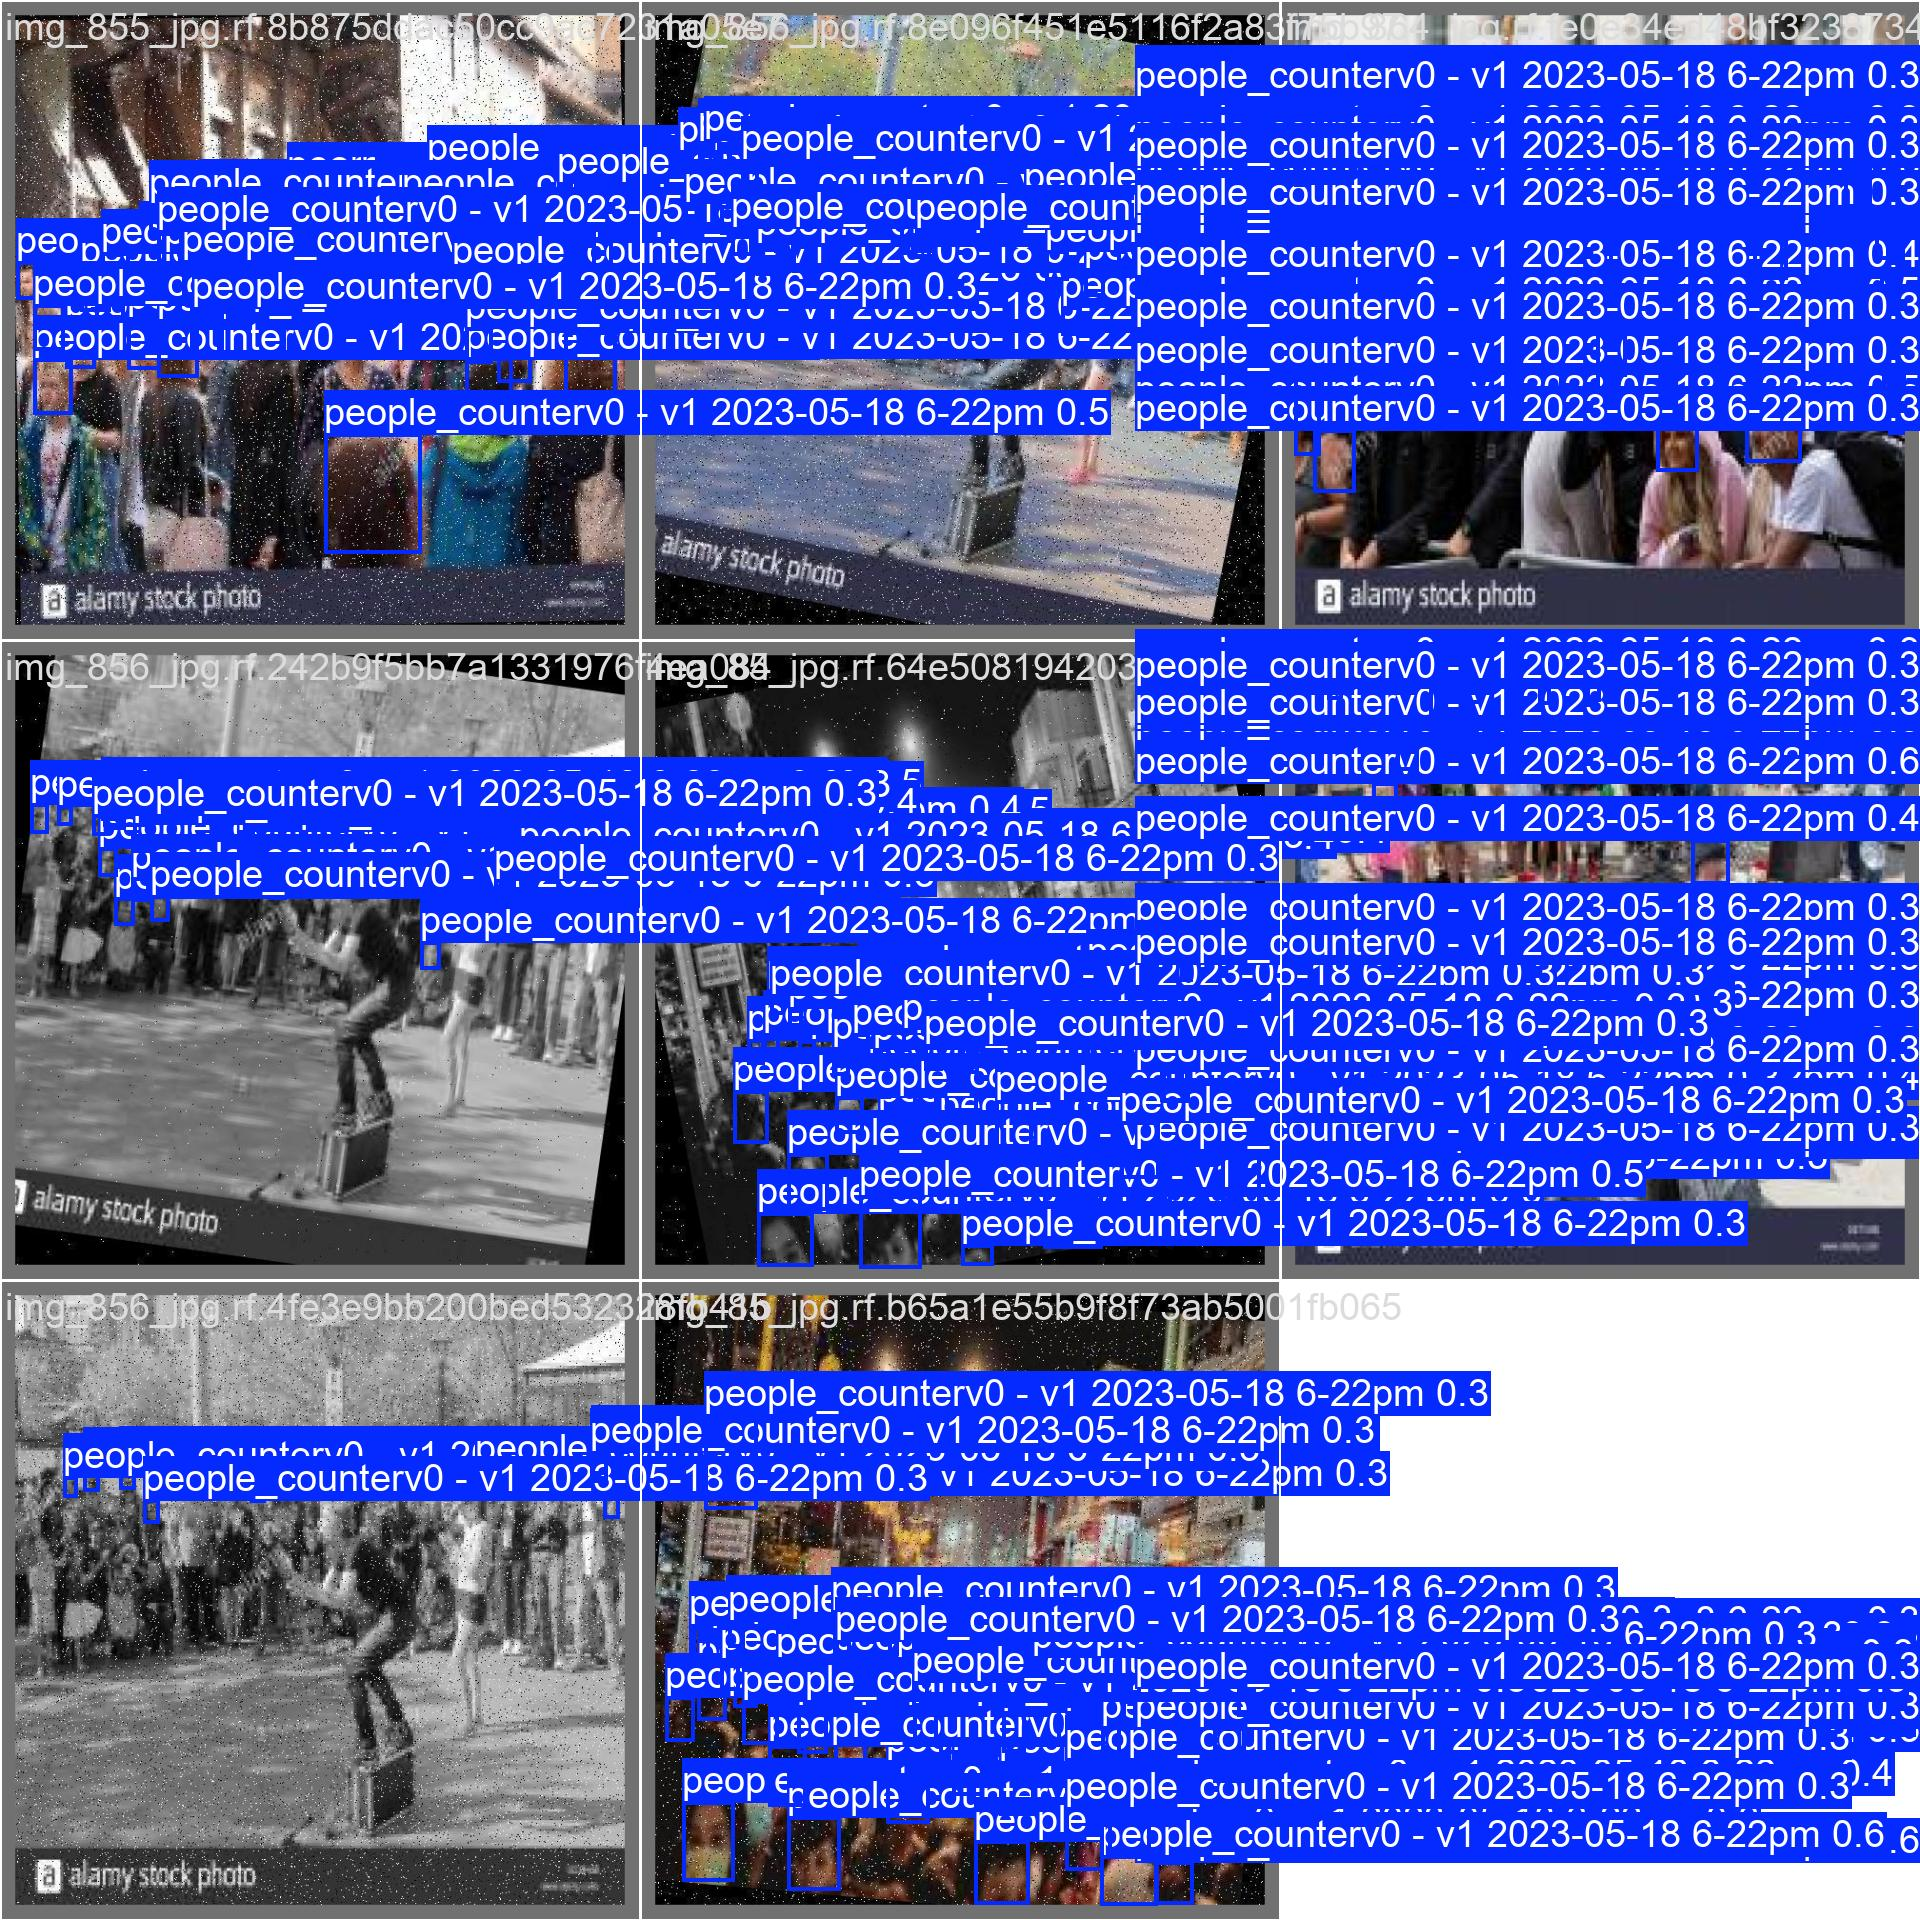

In [26]:
Image("/kaggle/working/runs/detect/train2/val_batch1_pred.jpg", width=600)

**Step # 07  Validate Fine-Tuned Model**

In [28]:
!yolo task=detect mode=val model="/kaggle/working/runs/detect/train2/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.7 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /kaggle/working/crowd-control-1/valid/labels.cache... 1332 images,
val: WARNING ⚠️ /kaggle/working/crowd-control-1/valid/images/img_407_jpg.rf.938cef515326d64f6a4dbd9053e55536.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /kaggle/working/crowd-control-1/valid/images/img_469_jpg.rf.dca3ac1f65354356a7066fa4100ac6bd.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /kaggle/working/crowd-control-1/valid/images/img_472_jpg.rf.2e91356af1ca311350dca1897b372315.jpg: 3 duplicate labels removed
val: WARNING ⚠️ /kaggle/working/crowd-control-1/valid/images/img_472_jpg.rf.8e29fed37b9235d7a23927185cdfab69.jpg: 3 duplicate labels removed
val: WARNING ⚠️ /kaggle/working/crowd-control-1/valid/images/img_472_jpg.rf.f5dcec8cf95b1656d950441ee60bca19.jpg: 3 duplicate labels removed
val: WARNING ⚠️ /kaggle/working/crowd-control-1/valid/im

**Step # 08 Inference with Custom Model on Images**

In [29]:
!yolo task=detect mode=predict model="/kaggle/working/runs/detect/train2/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.7 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/217 /kaggle/working/crowd-control-1/test/images/img_1000_jpg.rf.433d841dcd701c9c341306ddbee508af.jpg: 640x640 300 people_counterv0 - v1 2023-05-18 6-22pms, 14.4ms
image 2/217 /kaggle/working/crowd-control-1/test/images/img_1003_jpg.rf.909003901d27ed930b0f9e68ac44b062.jpg: 640x640 54 people_counterv0 - v1 2023-05-18 6-22pms, 13.2ms
image 3/217 /kaggle/working/crowd-control-1/test/images/img_1003_jpg.rf.94082e86c5bfd60f5f6c7739d12408a5.jpg: 640x640 57 people_counterv0 - v1 2023-05-18 6-22pms, 11.8ms
image 4/217 /kaggle/working/crowd-control-1/test/images/img_1004_jpg.rf.12af9dbf0098831585a349e97c41dc9b.jpg: 640x640 39 people_counterv0 - v1 2023-05-18 6-22pms, 11.0ms
image 5/217 /kaggle/working/crowd-control-1/test/images/img_1006_jpg.rf.08e6290220425a7755370e8db0d8d471.jpg: 640x640 90 people_counterv0 - v1 2023-05-18 6-22pm

**Step # 08 Inference with Custom Model on Videos**

In [30]:
# !yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="PPE_Part1.mp4" save=True

In [31]:
!zip -r /kaggle/working/runs.zip /kaggle/working/runs


  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/val/ (stored 0%)
  adding: kaggle/working/runs/detect/val/PR_curve.png (deflated 20%)
  adding: kaggle/working/runs/detect/val/val_batch2_labels.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/val/confusion_matrix.png (deflated 27%)
  adding: kaggle/working/runs/detect/val/val_batch1_labels.jpg (deflated 3%)
  adding: kaggle/working/runs/detect/val/P_curve.png (deflated 19%)
  adding: kaggle/working/runs/detect/val/R_curve.png (deflated 21%)
  adding: kaggle/working/runs/detect/val/val_batch0_labels.jpg (deflated 6%)
  adding: kaggle/working/runs/detect/val/val_batch0_pred.jpg (deflated 3%)
  adding: kaggle/working/runs/detect/val/confusion_matrix_normalized.png (deflated 31%)
  adding: kaggle/working/runs/detect/val/val_batch1_pred.jpg (deflated 3%)
  adding: kaggle/working/runs/detect/val/F1_curve.png (deflated 22%)
  adding: kaggle/working/runs/det